In [1]:
import torch

In [4]:
import torchvision

loss is 2.305837392807007
loss is 2.3012595176696777
loss is 2.2979512214660645
loss is 2.2961502075195312
loss is 2.29400897026062
loss is 2.285292148590088
loss is 2.284877300262451
loss is 2.2786941528320312
loss is 2.273843765258789
loss is 2.2772607803344727
loss is 2.2709100246429443
loss is 2.262226104736328
loss is 2.2631306648254395
loss is 2.2589995861053467
loss is 2.251807451248169
loss is 2.2407302856445312
loss is 2.234745502471924
loss is 2.2389421463012695
loss is 2.228264808654785
loss is 2.213756799697876
loss is 2.221204996109009
loss is 2.213749647140503
loss is 2.2197937965393066
loss is 2.21138334274292
loss is 2.20717453956604
loss is 2.212925672531128
loss is 2.184817314147949
loss is 2.1948835849761963
loss is 2.168355703353882
loss is 2.1894843578338623
loss is 2.1753783226013184
loss is 2.163170099258423
loss is 2.178128480911255
loss is 2.159404993057251
loss is 2.15677809715271
loss is 2.1788928508758545
loss is 2.1559789180755615
loss is 2.1557226181030273

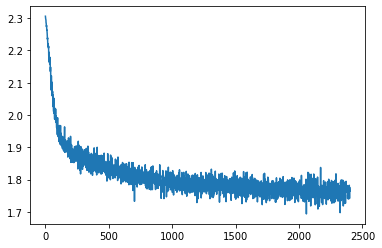

In [7]:
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np
class TorchSoftmax(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784,10,bias = True)
    def forward(self,images):
        out = self.linear(images)
        out = torch.softmax(out,dim=1)
        return out
if __name__ == "__main__":
    mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True,
                                                    transform=transforms.ToTensor())
    mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True,
                                                   transform=transforms.ToTensor())

    test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=500, shuffle=True)
    train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=500, shuffle=True)

    model2 = TorchSoftmax()
    optimizer = optim.SGD(model2.parameters(), lr=0.1)
    loss = nn.CrossEntropyLoss()
    epochs = 20
    losses = []
    for i in range(epochs):
        for batch in train_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model2(images)
            optimizer.zero_grad()
            erro = loss(preds, labels)
            losses.append(erro.item())
            erro.backward()
            optimizer.step()
            print("loss is " + str(erro.item()))

    global correct
    with torch.no_grad():
        correct = 0
        for batch in test_loader:
            images, labels = batch
            images = images.squeeze(1).reshape(-1, 784)
            preds = model2(images)
            preds = preds.argmax(dim=1)
            correct += (preds == labels).sum()
            print(correct)
    print(correct.item() * 1.0 / len(mnist_test))

    x = np.arange(1, len(losses)+1)
    plt.plot(x, losses) 

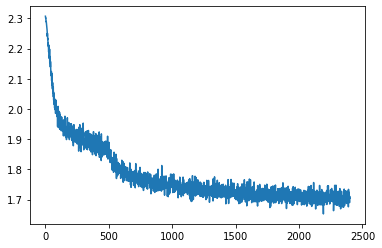

In [6]:
    x = np.arange(1, len(losses)+1)
    plt.plot(x, losses) 